In [1]:
%matplotlib widget

import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
import pandas as pd
from amftrack.util import get_dates_datetime, get_dirname
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
from amftrack.pipeline.functions.node_id import orient
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.experiment_class_surf import Experiment, Edge, Node, Hyphae, plot_raw_plus
from amftrack.pipeline.paths.directory import run_parallel, find_state, directory_scratch, directory_project
from amftrack.notebooks.analysis.util import * 
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from amftrack.pipeline.functions.hyphae_id_surf import get_pixel_growth_and_new_children
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 20})
from amftrack.plotutil import plot_node_skel

In [2]:
directory_project = "/projects/0/einf914/to_save/"
lapse = 58
exp = get_exp((38,0,0+lapse),directory_project)
exp.directory = directory_project

begin = 2021-08-18 13:24:00 
  end = 2021-08-23 15:24:00


In [36]:
length_network= [get_length(exp,t) for t in range(exp.ts)]
times= [get_time(exp,0,t) for t in range(exp.ts)]


In [26]:
length_network

[100532.95428162278,
 105092.05237444774,
 109057.55733551952,
 113628.01309404001,
 118087.28988420404,
 122595.60061198438,
 126082.4469066314,
 134972.8513770704,
 147327.26275129625,
 153567.9282760705,
 162772.0229801558,
 172777.42917390863,
 183953.1684881986,
 195711.0493468421,
 207145.07851932565,
 219188.56693892126,
 229466.94489752737,
 242227.86322856348,
 250894.50590277632,
 262280.43173837406,
 274119.91891386,
 303747.5087529222,
 294967.5708486381,
 327086.005770574,
 322752.88610053493,
 334773.88611336256,
 349363.96415677405,
 362506.11459301447,
 369431.45428531483,
 393503.4656231119,
 428520.43096215604,
 419290.66390965297,
 433555.51842443587,
 466676.5157311943,
 485629.31261130865,
 518874.90210283536,
 519214.6031399514,
 556410.1449505006,
 595418.8706312606,
 577054.8163249848,
 626100.0214793457,
 624748.8819816074,
 641828.2311208086,
 660856.4517864481,
 662079.7552565961,
 672838.556505237,
 693505.0257854576,
 740791.1302005247,
 741003.6256882208,


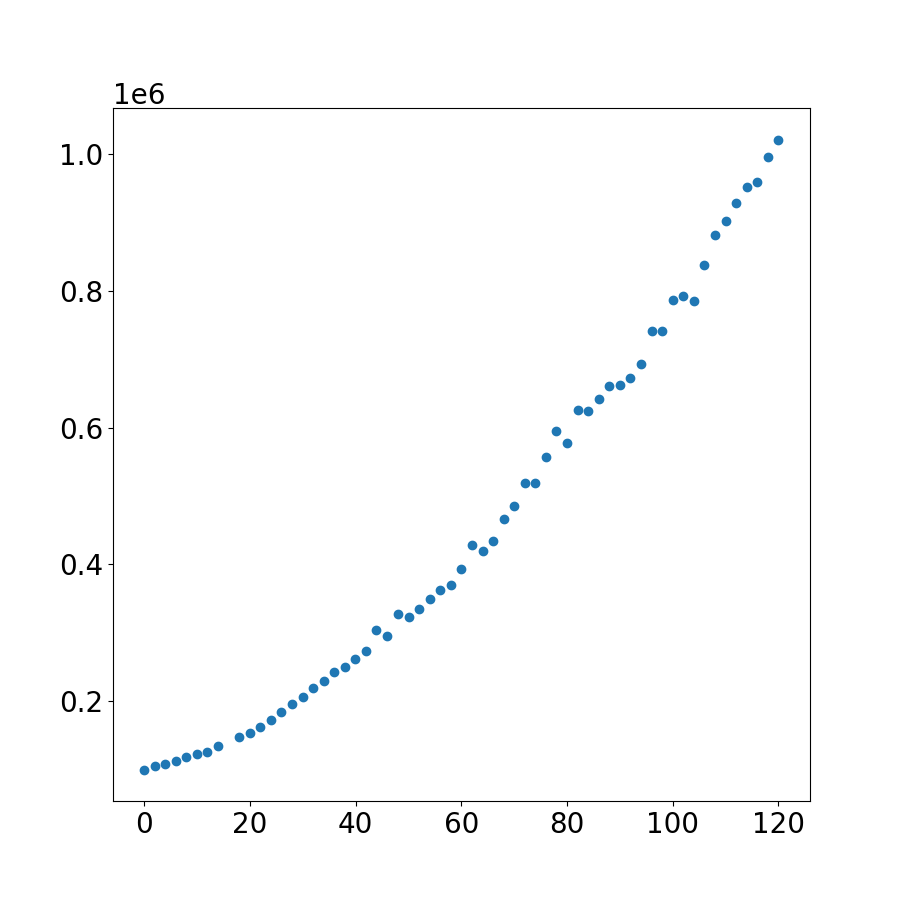

In [11]:
end = 60
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.scatter(times[:end],length_network[:end])

Text(0, 0.5, 'total network length $(mm)$')

Text(0.5, 0, 'time (h)')

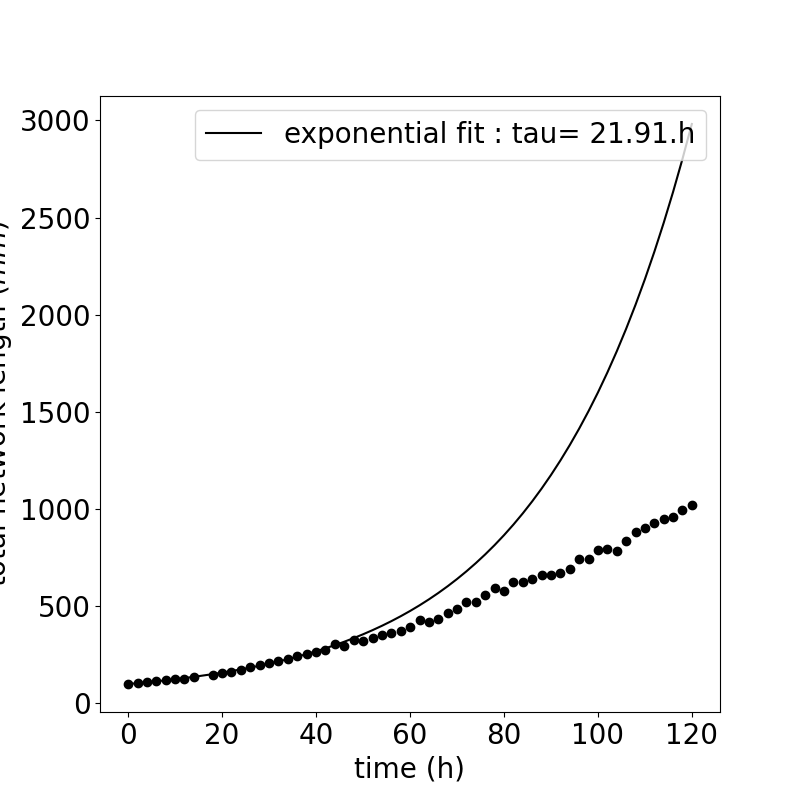

In [82]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(times[:end],np.array(length_network[:end])/1000,color='black')
ax.set_ylabel('total network length $(mm)$',fontdict={'size' : 20})
ax.plot(times[:end],func2(np.array(times[:end]),*popt1),label = f'exponential fit : tau= {"{:.2f}".format(popt1[0])}.h',color='black')
plt.legend(loc = 'upper right',ncol=1)
times= [get_time(exp,0,t) for t in range(exp.ts-1)]

# ax2 = ax.twinx()
# ax2.scatter(times,growing_tips,color='red')
# # ax2.plot(times_select,func2(np.array(times_select),*popt1),label = f'exponential fit : alpha= {"{:.2f}".format(popt1[0]*24)}.day-1',color='red')

# # ax2.set_ylabel('network length $(mm)$',fontdict={'size' : 20})
# ax2.set_ylabel('number of growing tips',fontdict={'size' : 20})
ax.set_xlabel('time (h)',fontdict={'size' : 20})


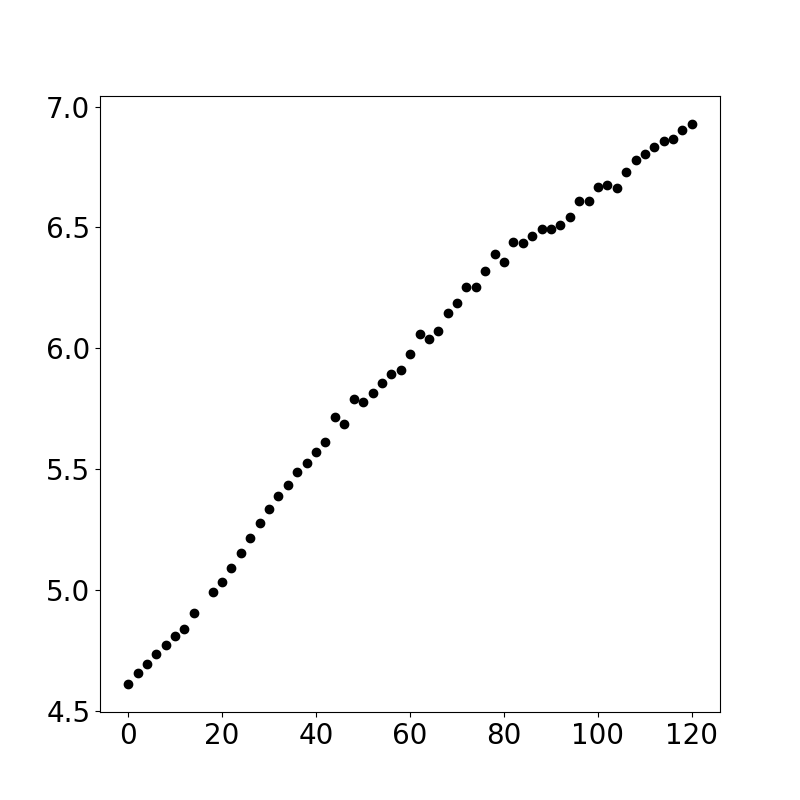

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(times[:end],np.log(np.array(length_network[:end])/1000),color='black')

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


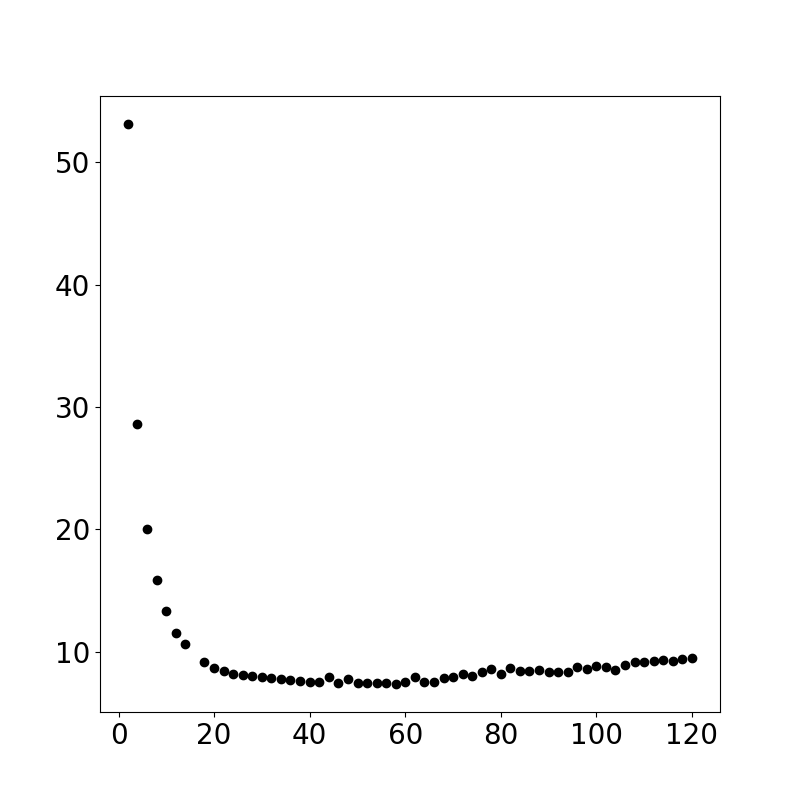

In [80]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(times[:end],np.array(length_network[:end])/1000/np.array(times)+1,color='black')

In [76]:
from scipy.optimize import curve_fit
stop = 20
def func2(t,alpha,C,d):
    return(C*(2**(t/alpha))+d)
popt1, pcov = curve_fit(func2, times[:stop],np.array(length_network[:stop])/1000,bounds = ([0,0,-np.inf],3*[np.inf]),p0=[1,1,0])

In [37]:
lapse = 10
derivatives = [(length_network[i+lapse]-length_network[i])/(times[i+lapse]-times[i]) for i in range(len(length_network)-lapse)]
times_dev = times[:-lapse]

Text(0, 0.5, 'total network growth speed$(\\mu m .h^{-1})$')

Text(0, 0.5, 'number of growing tips')

Text(0.5, 0, 'time (h)')

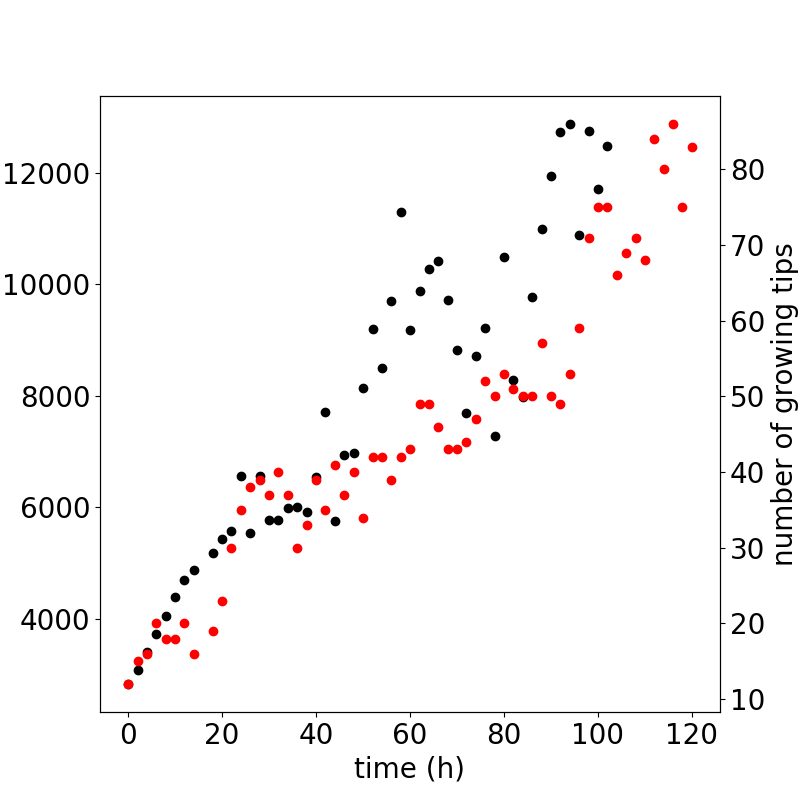

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(times_dev[:end],derivatives[:end],color='black', label = 'total network growth speed$(\mu m .h^{-1})$')
ax.set_ylabel('total network growth speed$(\mu m .h^{-1})$',fontdict={'size' : 20})

times= [get_time(exp,0,t) for t in range(exp.ts-1)]

ax2 = ax.twinx()
ax2.scatter(times,growing_tips,color='red', label = 'number of growing tips')
# ax2.plot(times_select,func2(np.array(times_select),*popt1),label = f'exponential fit : alpha= {"{:.2f}".format(popt1[0]*24)}.day-1',color='red')

# ax2.set_ylabel('network length $(mm)$',fontdict={'size' : 20})
ax2.set_ylabel('number of growing tips',fontdict={'size' : 20})
ax.set_xlabel('time (h)',fontdict={'size' : 20})

# plt.legend(loc = 'upper right',ncol=1)

In [115]:
select_hyph = get_hyph_infos(exp)


failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure 

In [120]:
def get_hyph_infos2(exp):
    select_hyph = {}
    for hyph in exp.hyphaes:
        if len(hyph.ts)>1:
            t = hyph.ts[0]
            tp1=hyph.ts[-1]
            pixels,nodes = get_pixel_growth_and_new_children(hyph,t,tp1)
            total_growth = np.sum([get_length_um(seg) for seg in pixels])
            speed = np.sum([get_length_um(seg) for seg in pixels])/get_time(exp,t,tp1)
            select_hyph[hyph]= total_growth,speed,pixels,nodes
    return(select_hyph)
select_hyph2 = get_hyph_infos2(exp)


failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge
failure in finding closest edge


In [121]:
branch_frequ = []
for hyph in select_hyph2.keys():
    total_growth,speed,pixels,nodes = select_hyph2[hyph]
    if total_growth>0:
        branch_frequ.append((len(nodes)-2)/total_growth)

In [110]:
growing_tips=[0 for i in range(exp.ts-1)]
times= [get_time(exp,0,t) for t in range(exp.ts-1)]

for hyph in exp.hyphaes:
    for t,tp1,speed,pixels in select_hyph[hyph]:
        if speed >= 20 and speed<400:
            growing_tips[t]+=1

[-1, Node(0)]


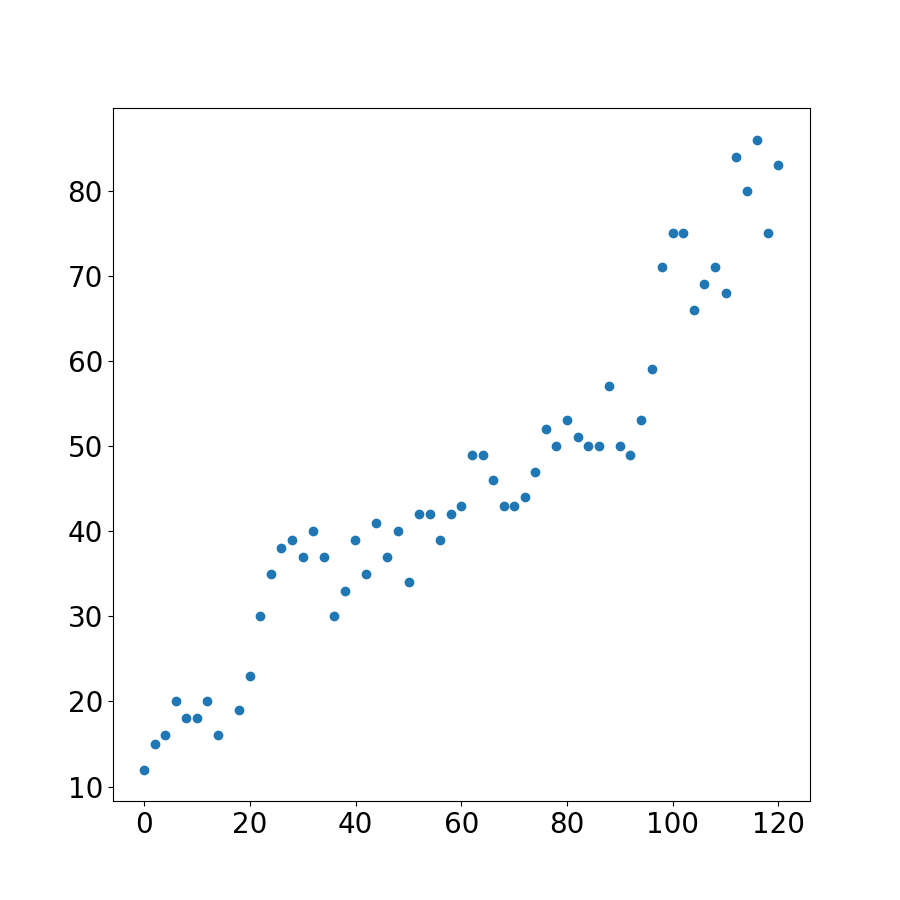

In [31]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.scatter(times,growing_tips)

In [83]:
speeds=[]
max_speeds = []
mean_speeds = []
total_growth = []
for hyph in exp.hyphaes:
    speeds_hyph = []
    growth_hyph = []
    for t,tp1,speed,pixels in select_hyph[hyph]:
        if speed >= 20 and speed<400:
            speeds.append(speed)
            speeds_hyph.append(speed)
            growth_hyph.append(speed*get_time(exp,t,tp1))
    if len(speeds_hyph)>0:
        max_speeds.append(max(speeds_hyph))
        mean_speeds.append(np.mean(speeds_hyph))
        total_growth.append(np.sum(growth_hyph))
        

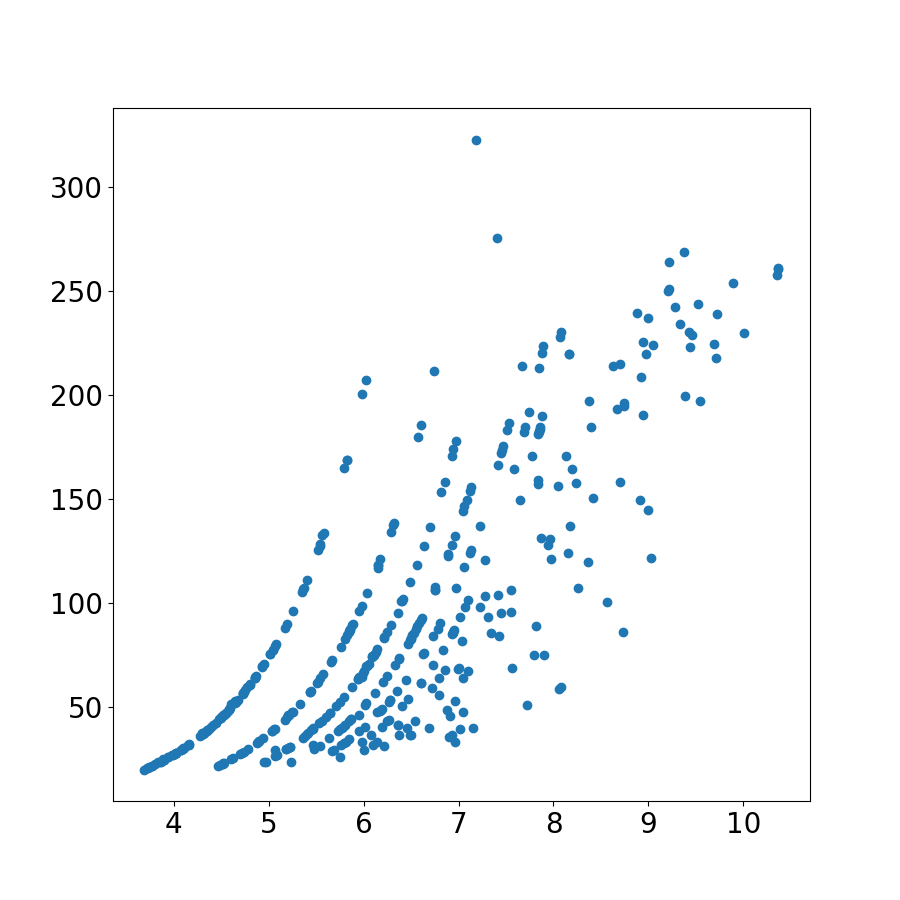

In [85]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.scatter(np.log(total_growth),mean_speeds)

(array([0.0096531 , 0.01206637, 0.01447965, 0.01055807, 0.00874812,
        0.0081448 , 0.00573153, 0.00633484, 0.00754148, 0.00452489,
        0.00331825, 0.00392157, 0.00180996, 0.00331825, 0.00301659,
        0.00180996, 0.00090498, 0.00211161, 0.00180996, 0.00271493,
        0.0015083 , 0.00361991, 0.00120664, 0.00180996, 0.00060332,
        0.0015083 , 0.00241327, 0.00211161, 0.00120664, 0.00060332,
        0.00090498, 0.00090498, 0.00060332, 0.00030166, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00030166]),
 array([ 20.02048221,  27.58897162,  35.15746103,  42.72595044,
         50.29443985,  57.86292926,  65.43141867,  72.99990808,
         80.56839749,  88.1368869 ,  95.70537631, 103.27386572,
        110.84235513, 118.41084454, 125.97933395, 133.54782336,
        141.11631277, 148.68480218, 156.25329159, 163.821781  ,
        171.39027041, 178.95875983, 186.52724924, 194.09573865,
        201.66422806, 209.23271747, 216.80120688, 224.36969629,
      

Text(0.5, 0, 'mean growth speed over all significant movements $( \\mu m. h^{-1})$')

Text(0, 0.5, 'distribution density')

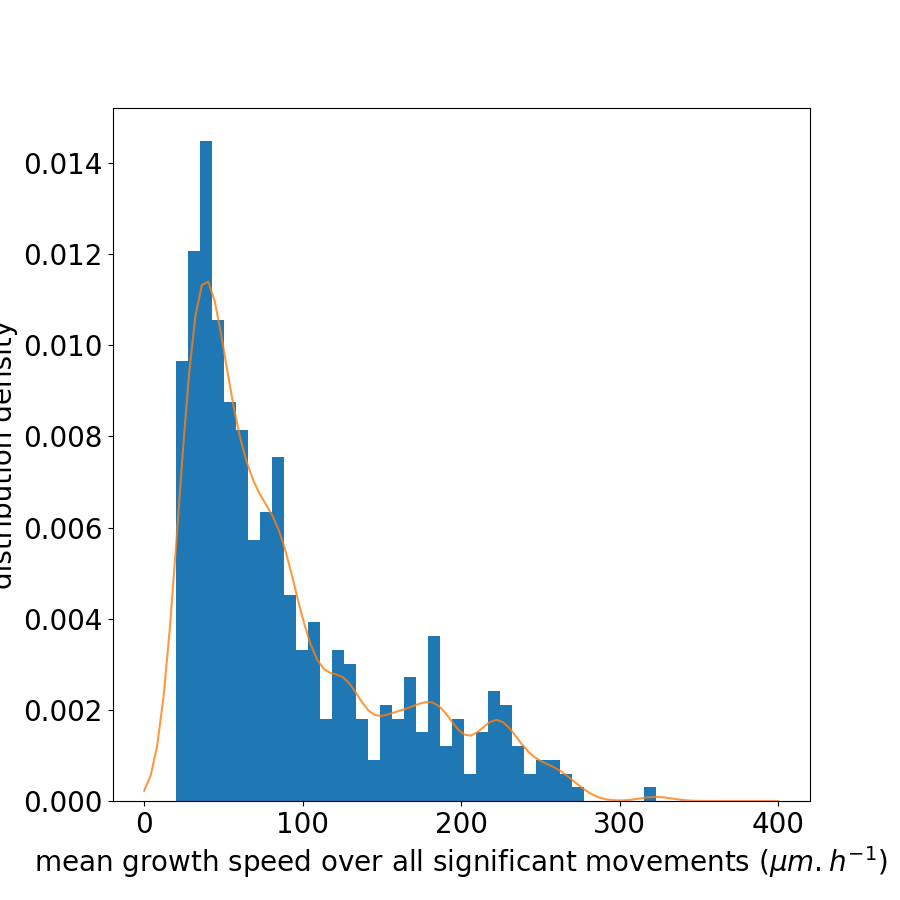

In [97]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
def getKernelDensityEstimation(values, x, bandwidth = 0.2, kernel = 'gaussian'):
    model = KernelDensity(kernel = kernel, bandwidth=bandwidth)
    model.fit(values[:, np.newaxis])
    log_density = model.score_samples(x[:, np.newaxis])
    return np.exp(log_density)
def bestBandwidth(data, minBandwidth = 0.1, maxBandwidth = 2, nb_bandwidths = 30, cv = 30):
    """
    Run a cross validation grid search to identify the optimal bandwidth for the kernel density
    estimation.
    """
    from sklearn.model_selection import GridSearchCV
    model = GridSearchCV(KernelDensity(),
                        {'bandwidth': np.linspace(minBandwidth, maxBandwidth, nb_bandwidths)}, cv=cv) 
    model.fit(data[:, None])
    return model.best_params_['bandwidth']
x = np.linspace(0,400,100)

data = np.array(mean_speeds)
# data = corrected.loc[corrected['treatment'] == '25*']['speed']

# data = plate_select['speed']

cv_bandwidth = bestBandwidth(data,minBandwidth=2,maxBandwidth=20)
# cv_bandwidth = 4


kde = getKernelDensityEstimation(data, x, bandwidth=cv_bandwidth)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.hist(mean_speeds,40,density=True)
ax.plot(x, kde, alpha = 0.8, label = f'bandwidth = {round(cv_bandwidth, 2)}')
ax.set_xlabel('mean growth speed over all significant movements $( \mu m. h^{-1})$',fontdict={'size' : 20})
ax.set_ylabel('distribution density',fontdict={'size' : 20})


(array([0.12308979, 0.15044308, 0.12308979, 0.13676643, 0.16411972,
        0.23250294, 0.20514965, 0.17779637, 0.2188263 , 0.16411972,
        0.24617958, 0.23250294, 0.34191609, 0.28720951, 0.3145628 ,
        0.25985623, 0.28720951, 0.2188263 , 0.2188263 , 0.30088616,
        0.2188263 , 0.08205986, 0.13676643, 0.0957365 , 0.19147301,
        0.10941315, 0.15044308, 0.04102993, 0.04102993, 0.04102993,
        0.06838322, 0.12308979, 0.01367664, 0.06838322, 0.08205986,
        0.02735329, 0.02735329, 0.02735329, 0.        , 0.04102993]),
 array([ 3.68990304,  3.85683764,  4.02377224,  4.19070684,  4.35764144,
         4.52457605,  4.69151065,  4.85844525,  5.02537985,  5.19231445,
         5.35924905,  5.52618365,  5.69311825,  5.86005285,  6.02698745,
         6.19392206,  6.36085666,  6.52779126,  6.69472586,  6.86166046,
         7.02859506,  7.19552966,  7.36246426,  7.52939886,  7.69633346,
         7.86326807,  8.03020267,  8.19713727,  8.36407187,  8.53100647,
         8.69794

Text(0.5, 0, 'total growth over the tracking of a tip $(log(\\mu m))$')

Text(0, 0.5, 'distribution density')

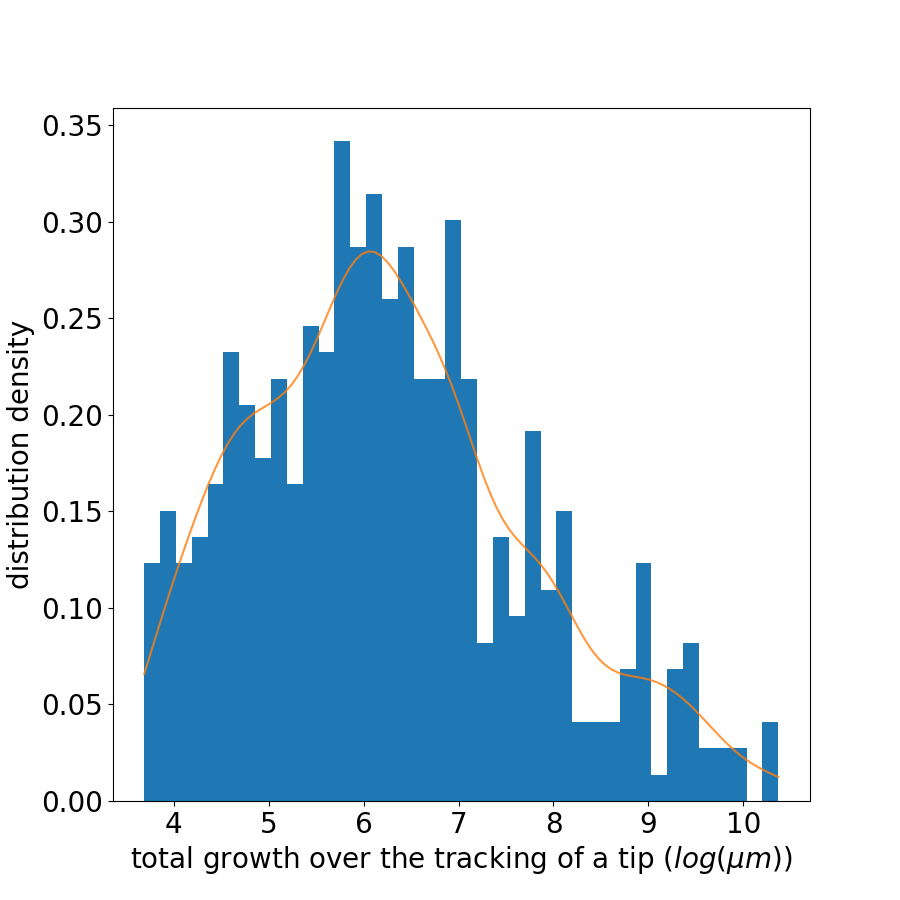

In [108]:
f = np.log
x = np.linspace(np.min(f(total_growth)),np.max(f(total_growth)),100)

data = f(np.array(total_growth))
# data = corrected.loc[corrected['treatment'] == '25*']['speed']

# data = plate_select['speed']

cv_bandwidth = bestBandwidth(data,minBandwidth=0.01,maxBandwidth=10)
# cv_bandwidth = 4


kde = getKernelDensityEstimation(data, x, bandwidth=cv_bandwidth)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.hist(data,40,density=True)
ax.plot(x, kde, alpha = 0.8, label = f'bandwidth = {round(cv_bandwidth, 2)}')
ax.set_xlabel('total growth over the tracking of a tip $(log(\mu m))$',fontdict={'size' : 20})
ax.set_ylabel('distribution density',fontdict={'size' : 20})

(array([331.53158037, 736.73684527, 478.87894943, 552.55263395,
        478.87894943, 331.53158037, 405.2052649 , 331.53158037,
        221.02105358, 221.02105358, 147.34736905, 110.51052679,
         73.67368453,  36.83684226,   0.        ,  36.83684226,
         36.83684226,  73.67368453,   0.        ,  73.67368453]),
 array([6.97288997e-05, 2.83482720e-04, 4.97236540e-04, 7.10990359e-04,
        9.24744179e-04, 1.13849800e-03, 1.35225182e-03, 1.56600564e-03,
        1.77975946e-03, 1.99351328e-03, 2.20726710e-03, 2.42102092e-03,
        2.63477474e-03, 2.84852856e-03, 3.06228238e-03, 3.27603620e-03,
        3.48979002e-03, 3.70354384e-03, 3.91729766e-03, 4.13105148e-03,
        4.34480530e-03]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'branching frequency $(\\mu m ^{-1})$')

Text(0, 0.5, 'distribution density')

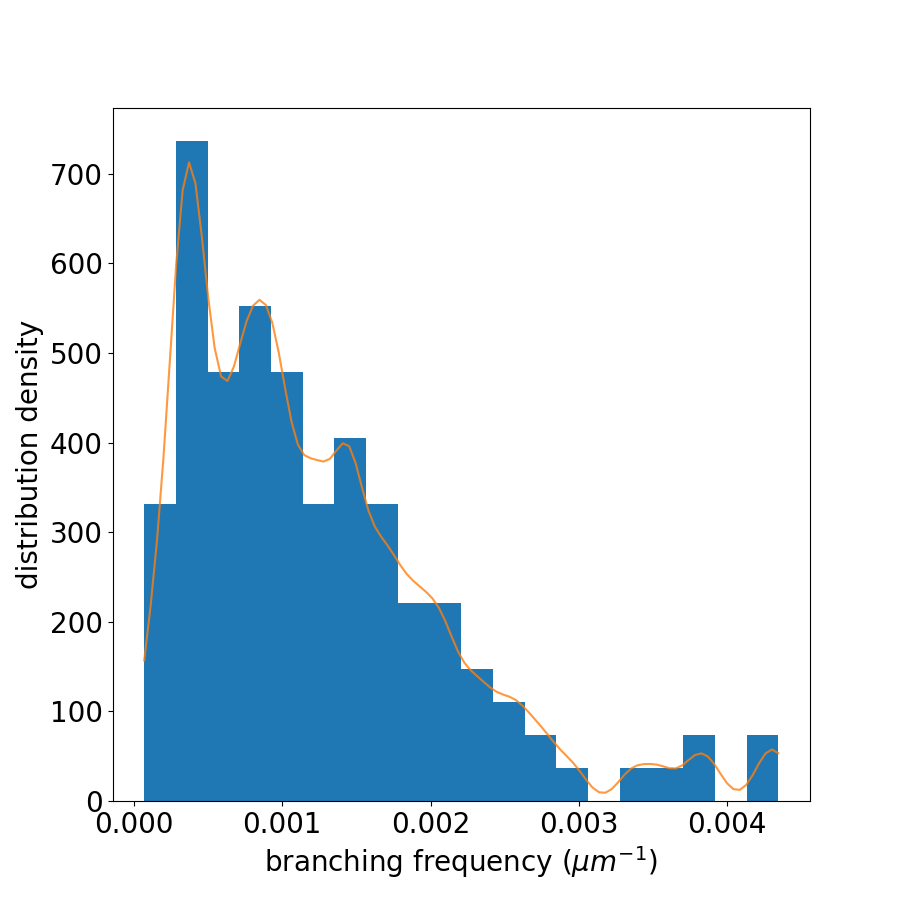

In [129]:
data = np.array([frequ for frequ in branch_frequ if frequ<0.005 and frequ >0])
x = np.linspace(np.min(data),np.max(data),100)

# data = corrected.loc[corrected['treatment'] == '25*']['speed']

# data = plate_select['speed']

cv_bandwidth = bestBandwidth(data,minBandwidth=0.0001,maxBandwidth=1)
# cv_bandwidth = 4


kde = getKernelDensityEstimation(data, x, bandwidth=cv_bandwidth)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.hist(data,20,density=True)
ax.plot(x, kde, alpha = 0.8, label = f'bandwidth = {round(cv_bandwidth, 2)}')
ax.set_xlabel('branching frequency $(\mu m ^{-1})$',fontdict={'size' : 20})
ax.set_ylabel('distribution density',fontdict={'size' : 20})